In [18]:
import tensorflow as tf
from tensorflow.keras import backend
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

In [19]:
train_dir = './train'
test_dir = './test'

In [20]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True
)

Found 11879 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(48, activation='relu'),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])


c:\Users\mglez\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 48)             │     2,764,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │         1,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,785,466 (10.63 MB)

 Trainable params: 2,785,466 (10.63 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# liberar memoria para amenizar el proceso de entrenamiento
# Liberar la memoria de la GPU
backend.clear_session()


In [25]:
#steps_per_epoch = train_generator.samples // train_generator.batch_size
#validation_steps = test_generator.samples // test_generator.batch_size

In [26]:
# Ajustar el modelo
history = model.fit(
    train_generator,
    steps_per_epoch=45,
    epochs=30,
    validation_data=test_generator,
    validation_steps=45
)

c:\Users\mglez\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 37s 670ms/step - accuracy: 0.5645 - loss: 0.6651 - val_accuracy: 0.6417 - val_loss: 0.6034
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 28s 621ms/step - accuracy: 0.7340 - loss: 0.5231 - val_accuracy: 0.6786 - val_loss: 0.5561
Epoch 3/30


c:\Users\mglez\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


45/45 ━━━━━━━━━━━━━━━━━━━━ 30s 680ms/step - accuracy: 0.7765 - loss: 0.4596 - val_accuracy: 0.7111 - val_loss: 0.5042
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 25s 567ms/step - accuracy: 0.7934 - loss: 0.4140 - val_accuracy: 0.7946 - val_loss: 0.5149
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 34s 755ms/step - accuracy: 0.8021 - loss: 0.4424 - val_accuracy: 0.7354 - val_loss: 0.4749
Epoch 6/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 26s 573ms/step - accuracy: 0.7775 - loss: 0.4623 - val_accuracy: 0.7786 - val_loss: 0.4395
Epoch 7/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 31s 681ms/step - accuracy: 0.8118 - loss: 0.4022 - val_accuracy: 0.8028 - val_loss: 0.4253
Epoch 8/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 24s 530ms/step - accuracy: 0.8131 - loss: 0.3981 - val_accuracy: 0.7357 - val_loss: 0.4611
Epoch 9/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 13s 274ms/step - accuracy: 0.8112 - loss: 0.3818 - val_accuracy: 0.8062 - val_loss: 0.4096
Epoch 10/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 48s 576ms/step - accuracy: 0.8440 - loss: 0.3434 - val_accuracy: 0.76

In [27]:
# Guardar el modelo completo
model.save('models/undecimo_cnn.h5')

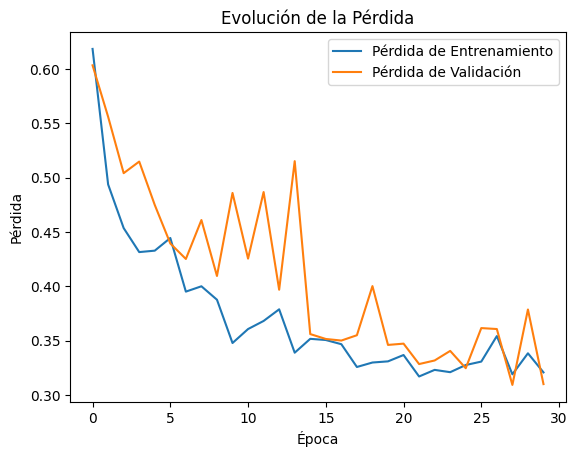

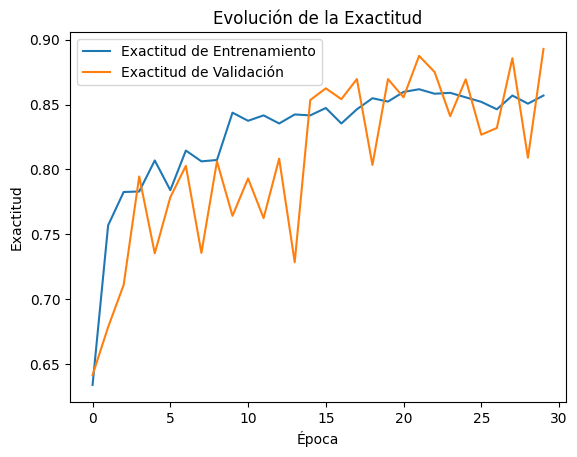

In [28]:
# Graficar la pérdida
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Evolución de la Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Graficar la exactitud
plt.plot(history.history['accuracy'], label='Exactitud de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Exactitud de Validación')
plt.title('Evolución de la Exactitud')
plt.xlabel('Época')
plt.ylabel('Exactitud')
plt.legend()
plt.show()

In [22]:
from IPython.display import display, HTML

html_content = """
<!DOCTYPE html>
<html lang="es">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Gráficas</title>
</head>
<body>
    <p>Esto no es exactamente lo que buscamos, ya que la gráfica que estamos buscando se parece más a esta:</p>
    <img src="img/perdida.png" alt="Gráfica Correcta" width="250">
    <img src="img/bien_entrenado.png" alt="Gráfica Correcta" width="250">
</body>
</html>
"""

# Mostrar el contenido HTML en el notebook
display(HTML(html_content))

Crearemos un nuevo modelo con menos capas para ver que resultado obtenemos

In [29]:
# Mostrar precision y perdida del modelo
loss, acc = model.evaluate(test_generator)
print(f'Pérdida: {loss}')
print(f'Exactitud: {acc}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 133ms/step - accuracy: 0.8954 - loss: 0.2842
Pérdida: 0.29906919598579407
Exactitud: 0.890500009059906


## Curva ROC

In [30]:
# Importar las bibliotecas necesarias para calcular y graficar la curva ROC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

In [31]:
# Leer el modelo
model = tf.keras.models.load_model('models/noveno_cnn.h5')

In [32]:
# Calcular el número de pasos necesarios para recorrer todo el conjunto de prueba
steps_test = int(np.ceil(test_generator.samples / test_generator.batch_size))

# Realizar predicciones usando el conjunto de prueba
y_pred_prob = model.predict(test_generator, steps=steps_test, verbose=1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 129ms/step


In [33]:
# Obtener las etiquetas verdaderas del generador de prueba
y_true = test_generator.classes

In [28]:
# Asegurarse de que las etiquetas verdaderas (y_true) y las predicciones (y_pred_prob) tengan la misma longitud
#assert len(y_true) == len(y_pred_prob), "Las predicciones y las etiquetas verdaderas tienen diferente número de muestras."

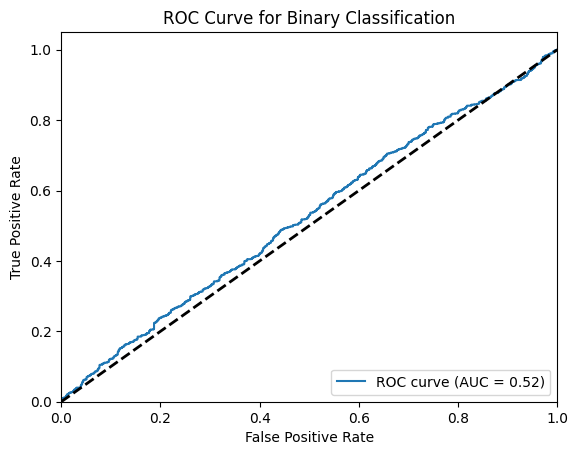

In [34]:
# Extraer las probabilidades para la clase positiva (por ejemplo, Maligno, que está en la segunda columna)
y_pred_prob_positive = y_pred_prob[:, 1]

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_true, y_pred_prob_positive)

# Calcular el AUC
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Línea diagonal de referencia
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Binary Classification')
plt.legend(loc='lower right')
plt.show()